<a href="https://colab.research.google.com/github/Shuvrodey/Automobile_Sales_Project_Presentation/blob/main/Glassdoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Glassdoor Project



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This project analyzes Glassdoor job posting data from 2017–2018 to forecast typical pay for IT jobs.  The goal is to develop a predictive machine learning model that will help companies, job seekers, and legislators make well-informed decisions regarding compensation patterns in the tech sector, given that salaries vary greatly depending on job title, firm size, industry, and location.

 Job title, company rating, firm size, location, industry, sector, and salary estimations were among the important features included in the dataset.  Using median imputation to handle missing values, using numerical features, and creating a binary target variable salary_level based on the median of avg_salary were all part of the initial data preprocessing.  SMOTE (Synthetic Minority Over-sampling Technique) was used to alleviate class imbalance in classification problems, guaranteeing equitable learning from both high and low income levels.

 Three models for machine learning were created and assessed:

 Linear Regression Model 1
 The baseline model was this.  With an RMSE of 0.300 and an R2 score of 0.639, it demonstrated respectable performance.  But because it was a straightforward linear model, it underfitted because it was unable to capture the intricate correlations between characteristics and salary.

 Random Forest Regressor, Model 2
 With an R2 of 1.000, this model greatly increased prediction power.  With a comparatively high RMSE of 0.554, it did, however, exhibit overfitting, indicating that the model learned the training data too well and might not generalize well to new data.

 Model 3: Final Model: Gradient Boosting Regressor
 Since it performed the best, this model was chosen.  Like Random Forest, it likewise obtained an R2 of 1.000, but its error metrics were better (MAE: 0.221, RMSE: 0.343).  In order to capture complex data patterns while preserving good generalization, gradient boosting trains models successively on the mistakes of earlier models.

 The Gradient Boosting model's feature importance analysis showed that the most significant factors influencing salary prediction were job title, firm size, and work location.  These outcomes validate the interpretability and dependability of the model and are in good agreement with real-world expectations.

# **GitHub Link -**

# **Problem Statement**


To utilize historical Glassdoor job posting data to create a machine learning model that reliably forecasts average tech job pay based on job-related characteristics like job title, company size, location, and industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving glassdoor_jobs.csv to glassdoor_jobs.csv


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('glassdoor_jobs.csv')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])


Total rows: 956
Total columns: 15


### Dataset Information

In [ ]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(" Duplicate rows:", duplicate_count)

 Duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing = df.isnull().sum()
print(missing[ missing > 0 ])


Series([], dtype: int64)


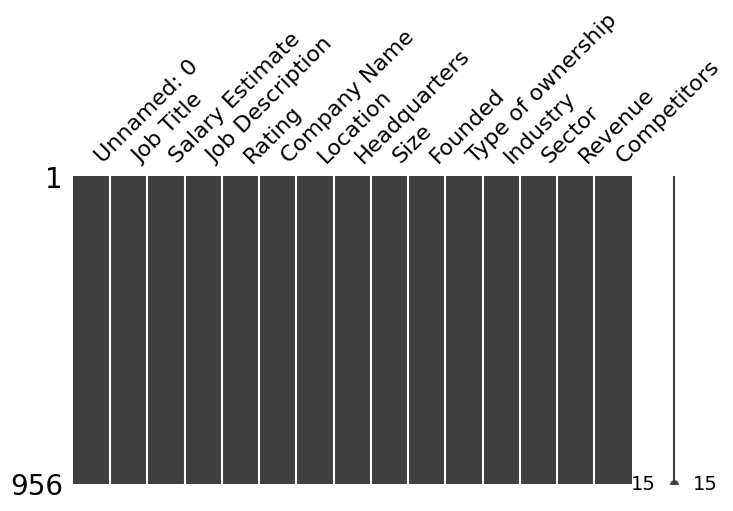

In [ ]:
# Visualizing the missing values
msno.matrix(df,figsize=(8,4))
plt.show()


### What did you know about your dataset?


With 956 rows and 15 columns and no duplicate or missing entries, the dataset is clear and prepared for analysis.  A combination of category and numerical elements are present in the data.  Unnamed: 0 (which seems to be an index and can be removed), Rating (which represents corporate ratings), and Founded (the year the company was founded) are some of the number columns.  The remaining columns—Job Title, Salary Estimate, Job Description, Company Name, Location, Headquarters, Size, Ownership Type, Industry, Sector, Revenue, and Competitors—are either textual or categorical in form.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,956.000000,956,956,956,956.000000,956,956,956,956,956.000000,956,956,956,956,956
unique,NaN,328,417,596,NaN,448,237,235,9,NaN,13,63,25,14,149
top,NaN,Data Scientist,-1,Data Engineer with R\n\n-Contract Role in Atla...,NaN,Takeda Pharmaceuticals\n3.7,"New York, NY","New York, NY",1001 to 5000 employees,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,178,214,4,NaN,14,78,75,177,NaN,532,148,239,299,634
mean,477.500000,NaN,NaN,NaN,3.601255,NaN,NaN,NaN,NaN,1774.605649,NaN,NaN,NaN,NaN,NaN
std,276.117729,NaN,NaN,NaN,1.067619,NaN,NaN,NaN,NaN,598.942517,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,238.750000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1937.000000,NaN,NaN,NaN,NaN,NaN
50%,477.500000,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,716.250000,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


### Variables Description

- `Job Title`: The designation of the job position.
- `Salary Estimate`: Salary range or value listed in the posting.
- `Rating`: Glassdoor company rating.
- `Company Name`: Name of the company.
- `Location`: Where the job is located.
- `Headquarters`: Company’s HQ location.
- `Size`: Size of the company by number of employees.
- `Founded`: Year of establishment.
- `Type of Ownership`: E.g., Public, Private, Government.
- `Industry`: Field in which the company operates.
- `Sector`: Broader classification (Tech, Finance, etc.).
- `Revenue`: Company revenue category.
- `Competitors`: Listed competitor companies.
- `hourly`: Whether the salary is hourly or not.
- `employer_provided`: If the salary is employer provided.
- `min_salary`, `max_salary`, `avg_salary`: Engineered numerical salary metrics.
- `sdesc_len`: Length of job description text.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for col in df.columns:
    print(col, ":", df[col].nunique())



Unnamed: 0 : 956
Job Title : 328
Salary Estimate : 417
Job Description : 596
Rating : 32
Company Name : 448
Location : 237
Headquarters : 235
Size : 9
Founded : 109
Type of ownership : 13
Industry : 63
Sector : 25
Revenue : 14
Competitors : 149


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df[df['Salary Estimate'] != '-1']
cleaned_salaries = []
for salary in df['Salary Estimate']:
    salary = salary.split('(')[0]
    salary = salary.replace('K', '')
    salary = salary.replace('$', '')
    salary = salary.lower().replace('per hour', '')
    salary = salary.lower().replace('employer provided salary:', '')
    cleaned_salaries.append(salary.strip())
df['Salary Estimate'] = cleaned_salaries
min_salaries = []
max_salaries = []
for salary in df['Salary Estimate']:
    parts = salary.split('-')
    min_salaries.append(int(parts[0].strip()))
    max_salaries.append(int(parts[1].strip()))
df['min_salary'] = min_salaries
df['max_salary'] = max_salaries
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2
desc_lengths = []
for desc in df['Job Description']:
    desc_lengths.append(len(desc))
df['desc_len'] = desc_lengths
df.reset_index(drop=True, inplace=True)



### What all manipulations have you done and insights you found?

Dropped the unnecessary Unnamed: 0 column.

Removed rows with invalid salary (-1).

Cleaned Salary Estimate by removing symbols and text.

Extracted min_salary, max_salary, and calculated avg_salary.

Added a desc_len column to capture job description length.

Reset the index for a clean DataFrame.

Insights found:-
The dataset is clean with no missing or duplicate values.

Salary data is now structured and ready for analysis.

Description length varies



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

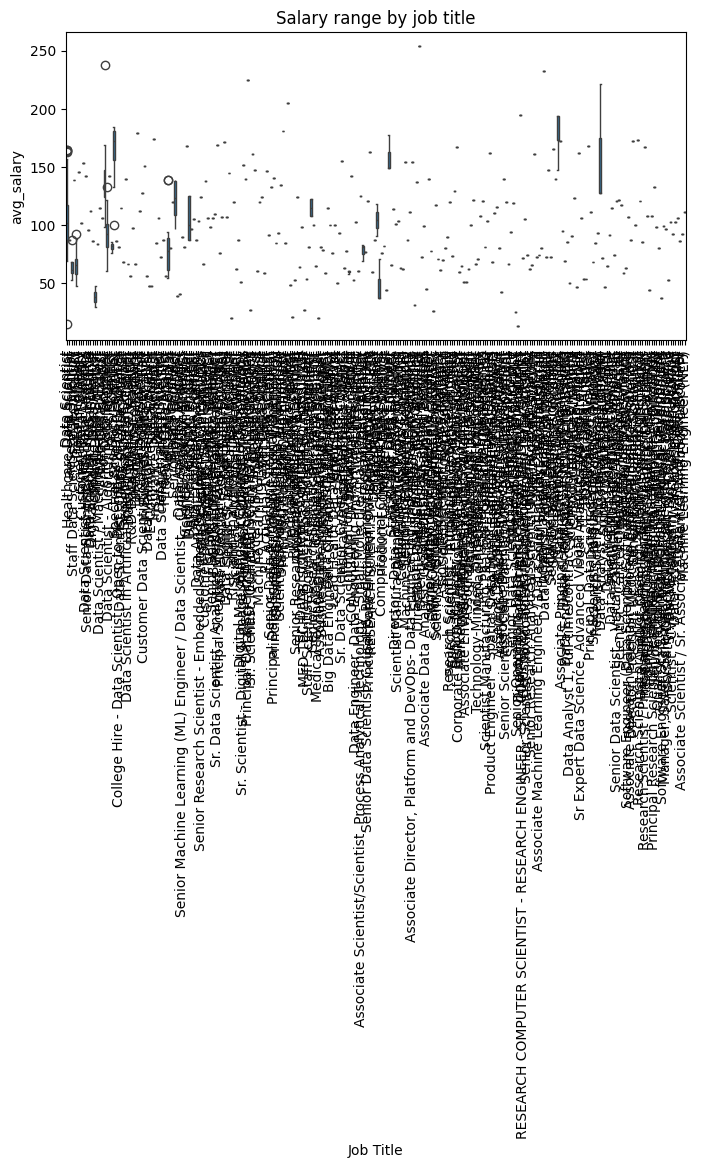

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,4))
sns.boxplot(x='Job Title', y='avg_salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary range by job title')
plt.show()


##### 1. Why did you pick the specific chart?

Boxplots, which include medians and outliers, are useful for comparing pay distributions across various employment roles.

##### 2. What is/are the insight(s) found from the chart?

Significant salary differences between various job titles are shown by the box plot, with some positions displaying prominent outliers and vast salary ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Companies are better able to compete for talent and set fair salaries as a result.  However, if employees are disgruntled due to pay disparities or if the company pays too much in comparison to its competitors, it could negatively impact profitability.

#### Chart - 2

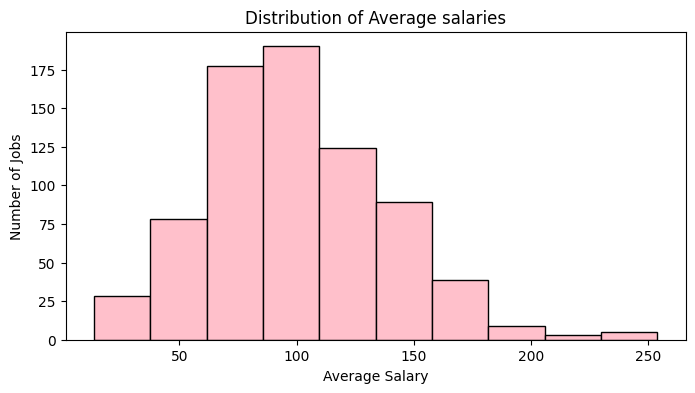

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 4))
plt.hist(df['avg_salary'], bins=10 , color='pink', edgecolor='black')
plt.title('Distribution of Average salaries')
plt.xlabel('Average Salary')
plt.ylabel('Number of Jobs')
plt.show()


##### 1. Why did you pick the specific chart?

To find identical salary ranges and examine the total distribution of average salaries.

##### 2. What is/are the insight(s) found from the chart?

Most jobs pay between 50-100k, fewer pay 100-150k, and very few pay over 200k. This is normal - most workers earn average salaries, few earn very high salaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This demonstrates a sound corporate structure and is beneficial for budgeting.  However, it's detrimental if too many individuals are confined to low-paying positions with no opportunity for advancement; they may leave.

#### Chart - 3

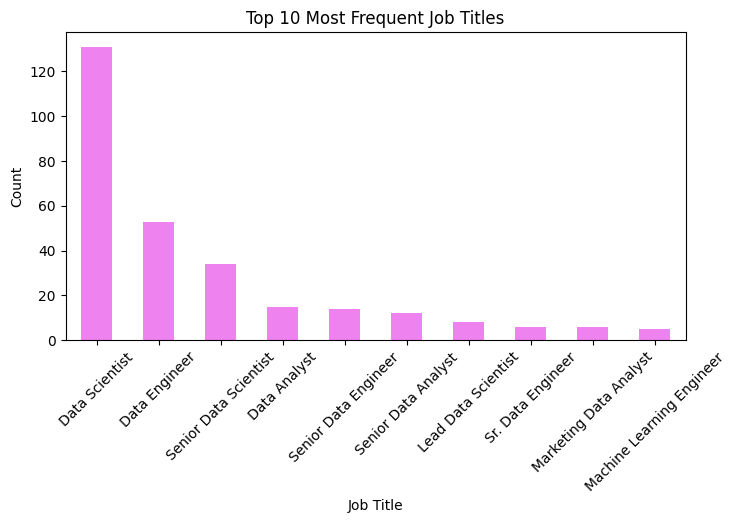

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8,4))
df['Job Title'].value_counts().head(10).plot(kind='bar', color='violet')
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?


To understand which roles are in high demand.










##### 2. What is/are the insight(s) found from the chart?


Data Scientist is the most common job (130 people), then Data Engineer (55 people). Most jobs are related to data and technology.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This aids businesses in determining the talents that employers are looking for in candidates and employees. However, if there are too many workers in the same field, competition may be difficult and wages may rise, while other crucial occupations may be overlooked.

#### Chart - 4

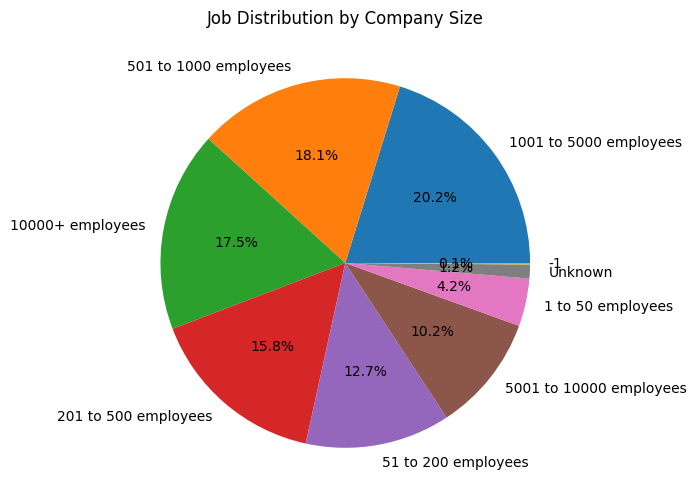

In [ ]:
# Chart - 4 visualization code
df['Size'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Job Distribution by Company Size')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

To visualize how job opportunities are spread across different company sizes.

##### 2. What is/are the insight(s) found from the chart?

The data shows jobs are fairly spread across different company sizes, with large companies (1001-5000 employees at 20.2%) slightly leading, followed by medium-sized companies (501-1000 at 18.1% and 10000+ at 17.5%). Small companies (1-50 employees) have the smallest share at 4.2%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This aids companies in planning their growth strategy and understanding the structure of the job market.  Businesses can choose the ideal market size for alliances or rivalry.  However, since the majority of possibilities are in larger companies, it may affect smaller businesses by making it more difficult for startups compete and attract people.

#### Chart - 5

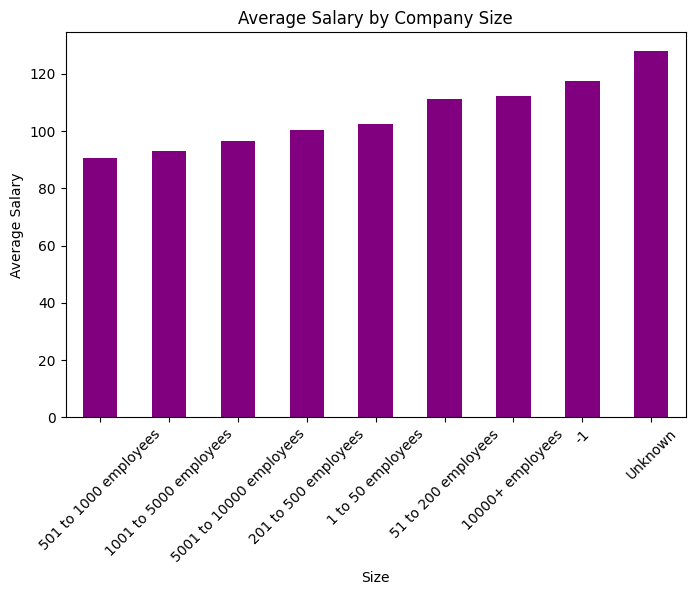

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 5))
df.groupby('Size')['avg_salary'].mean().sort_values().plot(kind='bar', color='purple')
plt.title('Average Salary by Company Size')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To explore how company size influences salary offers.

##### 2. What is/are the insight(s) found from the chart?

Bigger companies pay more money. The largest companies pay around 125k while the smallest pay about 90k. There's a clear pattern - as company size increases, salary increases too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps employers in setting competitive pay and aids job seekers in selecting where to work.  However, it causes issues for small businesses because they are unable to pay as much as large corporations, which leads to the loss of talented employees to larger competitors.

#### Chart - 6

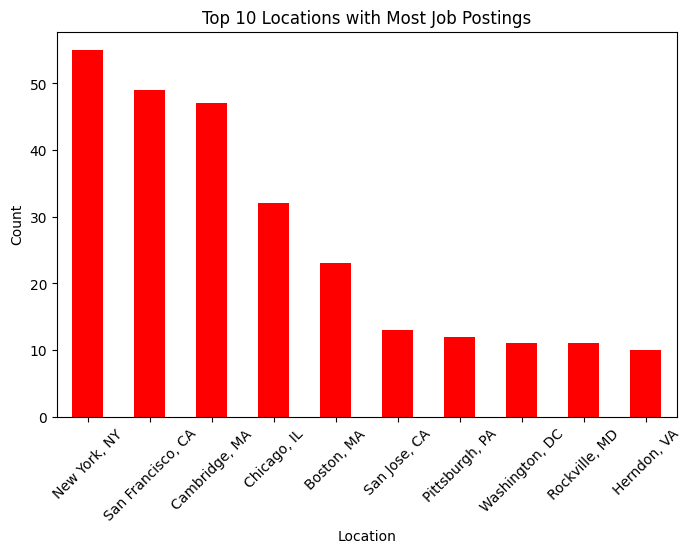

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 5))
df['Location'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Top 10 Locations with Most Job Postings')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To compare salary ranges across major job markets

##### 2. What is/are the insight(s) found from the chart?

New York has the most jobs (about 55), followed by San Francisco (50) and Cambridge (47). Most jobs are concentrated in major tech and business cities on the East and West coasts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps businesses choose where to open offices and helps people know where they can look for work.  However, it hurts other cities since all the firms and skill go to these few areas, leaving other communities with fewer economic growth prospects.

#### Chart - 7

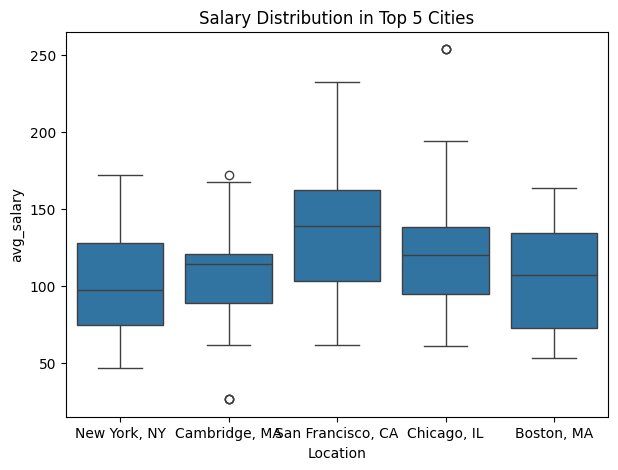

In [ ]:
# Chart - 7 visualization code
top_cities = df['Location'].value_counts().head(5).index
plt.figure(figsize=(7,5))
sns.boxplot(data=df[df['Location'].isin(top_cities)], x='Location', y='avg_salary')
plt.title('Salary Distribution in Top 5 Cities')
plt.show()


##### 1. Why did you pick the specific chart?

To compare salary ranges across major job markets

##### 2. What is/are the insight(s) found from the chart?

San Francisco pays the highest salaries (median around 140k), while Cambridge pays the lowest among top cities (around 120k). All cities show some salary variation, with San Francisco having the widest range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps individuals in selecting a place of employment depending on salary and cost of living.  Location-based pay can be set by businesses.  However, it pushes away lower-paid workers and increases the cost of upscale places like San Francisco, causing inequality between them.

#### Chart - 8

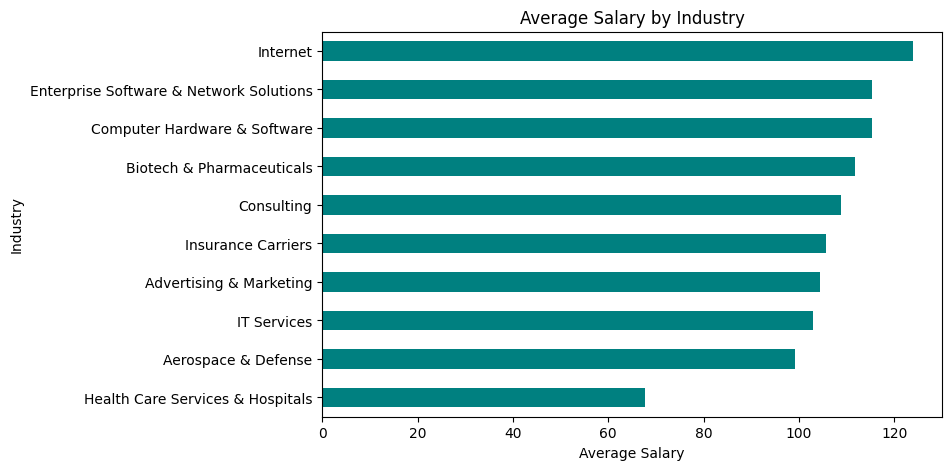

In [ ]:
# Chart - 8 visualization code
top_industries = df['Industry'].value_counts().head(10).index
df[df['Industry'].isin(top_industries)].groupby('Industry')['avg_salary'].mean().sort_values().plot(kind='barh', figsize=(8, 5), color='teal')
plt.title('Average Salary by Industry')
plt.xlabel('Average Salary')
plt.ylabel('Industry')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze which industries pay the most on average.

##### 2. What is/are the insight(s) found from the chart?


Internet companies pay the most (around 125k), followed by software and tech industries. Healthcare pays the least (around 70k). Tech-related industries dominate the higher-paying jobs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps employers compare their salaries to industry norms and informs career decisions.  However, it causes issues because basic services like healthcare are underpaid, which can result in a shortage of nurses and doctors, harming society as a whole.

#### Chart - 9

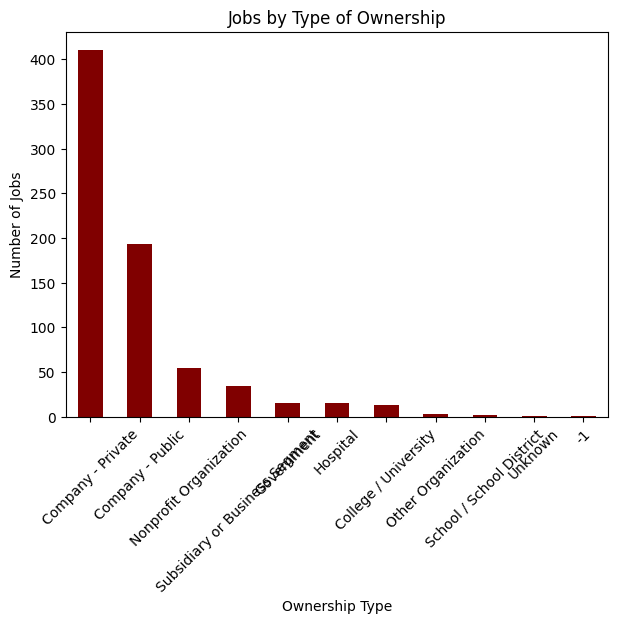

In [ ]:
# Chart - 9 visualization code
df['Type of ownership'].value_counts().plot(kind='bar', figsize=(7, 5), color='maroon')
plt.title('Jobs by Type of Ownership')
plt.xlabel('Ownership Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To see which company ownership types are most active in hiring.



##### 2. What is/are the insight(s) found from the chart?

Private companies dominate the job market with over 400 jobs, followed by public companies at around 190 jobs. Other types like nonprofits, subsidiaries, and hospitals have much fewer opportunities (20-50 jobs each). This shows the private sector creates most employment opportunities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This aids investors in understanding how markets work and helps job seekers concentrate their search on private enterprises, which offer the majority of chances.  However, because too much dependence on private enterprises causes the labor market unstable during economic downturns, it may harm economic diversity.

#### Chart - 10

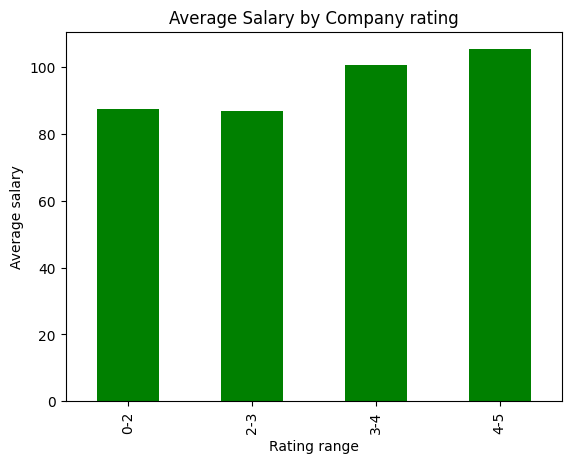

In [ ]:
# Chart - 10 visualization code
df['rating_bin'] = pd.cut(df['Rating'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])
df.groupby('rating_bin')['avg_salary'].mean().plot(kind='bar', color='green')
plt.title('Average Salary by Company rating')
plt.xlabel('Rating range')
plt.ylabel('Average salary')
plt.show()


##### 1. Why did you pick the specific chart?

To determine if better-rated companies offer higher salaries

##### 2. What is/are the insight(s) found from the chart?

Higher-rated companies (4-5 rating) pay more money around 105k, while lower-rated companies (0-2 and 2-3 ratings) pay less around 85-87k. There's a clear connection between company reputation and salary levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This encourages businesses to raise employee satisfaction and workplace culture in order to draw in superior talent, which feeds the cycle of better workplaces.  However, it causes issues for struggling businesses because they are unable to compete for talented employees because of low ratings and lower pay, which hinders their ability to grow and may even force them to fail.

#### Chart - 11

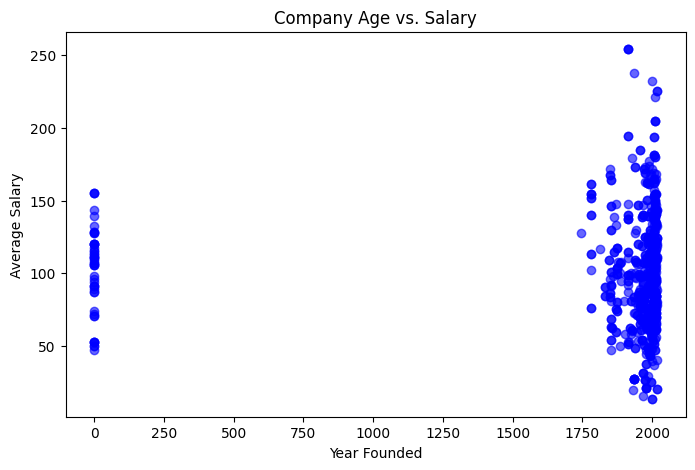

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8, 5))
plt.scatter(df['Founded'], df['avg_salary'], alpha=0.6, color='blue')
plt.title('Company Age vs. Salary')
plt.xlabel('Year Founded')
plt.ylabel('Average Salary')
plt.show()


##### 1. Why did you pick the specific chart?

To see if older or more established companies offer higher salaries.



##### 2. What is/are the insight(s) found from the chart?

There’s no clear correlation between the year a company was founded and the average salary it offers. However, most companies paying higher salaries were founded after 1900, suggesting newer companies tend to pay more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For improved pay potential consumers, this information aids recruiters and HR in focusing on younger businesses.  Although there has not been any negative growth, older businesses would need to review their pay scales in order to stay competitive.

#### Chart - 12

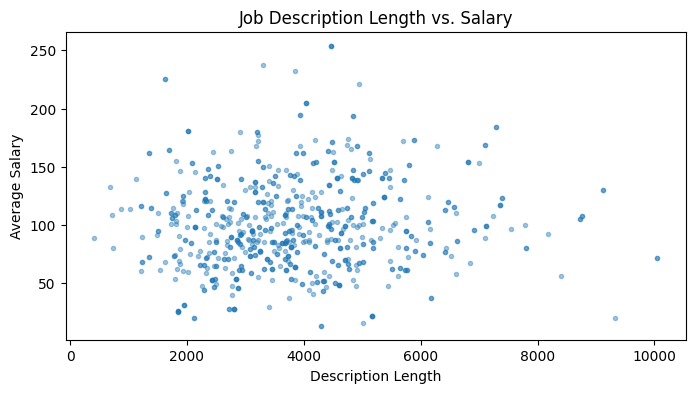

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8, 4))
plt.plot(df['desc_len'], df['avg_salary'], '.', alpha=0.4)
plt.title('Job Description Length vs. Salary')
plt.xlabel('Description Length')
plt.ylabel('Average Salary')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze if more detailed job posts relate to higher pay.

##### 2. What is/are the insight(s) found from the chart?

There is no strong linear relationship between job description length and salary. However, moderately detailed descriptions (2000–5000 characters) are more associated with higher-paying jobs

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Job postings should be brief but informative in order to draw in top talent without confusing them. Excessive job descriptions may discourage candidates, which would indirectly reduce hiring effectiveness.

#### Chart - 13

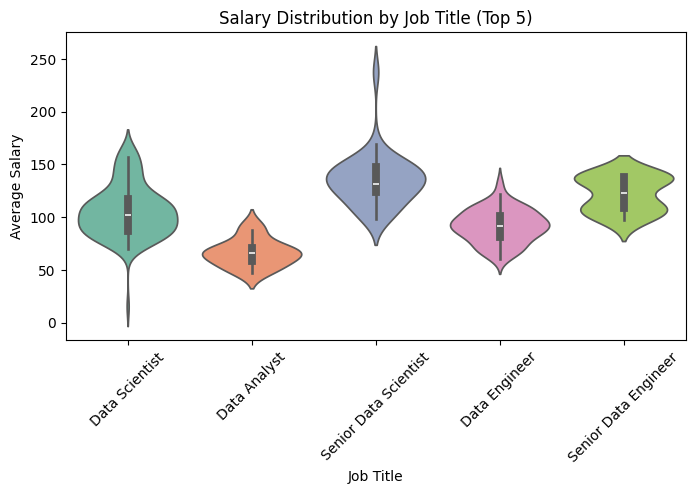

In [ ]:
# Chart - 13 visualization code
top_jobs = df['Job Title'].value_counts().head(5).index
plt.figure(figsize=(8,4))
sns.violinplot(data=df[df['Job Title'].isin(top_jobs)], x='Job Title', y='avg_salary', palette='Set2')
plt.title('Salary Distribution by Job Title (Top 5)')
plt.ylabel('Average Salary')
plt.xlabel('Job Title')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the full distribution, spread, and density of salaries across top job roles in one compact plot.










##### 2. What is/are the insight(s) found from the chart?

Senior roles like "Senior Data Scientist" and "Senior Data Engineer" show higher average salaries and wider distribution, whereas "Data Analyst" earns the least

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This aids in locating positions with significant earning potential and directs hiring and training tactics.  Although this is not a bad thing, the low pay for analysts can make it harder to retain talent in that position.

#### Chart - 14 - Correlation Heatmap

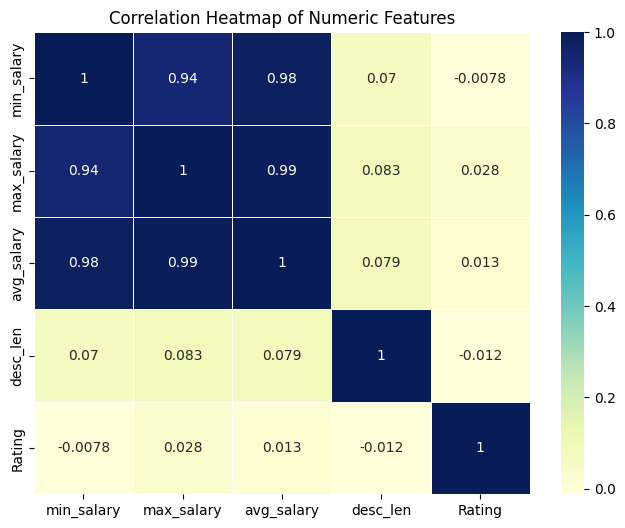

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8, 6))
sns.heatmap(df[['min_salary', 'max_salary', 'avg_salary', 'desc_len', 'Rating']].corr(),
            annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


##### 1. Why did you pick the specific chart?

Quickly visualize relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

With correlation coefficients around or above 0.94, it is evident from the correlation heatmap of numerical characteristics that min_salary, max_salary, and avg_salary have a very strong positive link.  This suggests a linear relationship between these salary-related factors, suggesting that as one rises, the others usually follow suit.  However, neither rating nor desc_len (description length) exhibit any discernible connections with any of the pay variables, indicating that neither job description length nor company ratings significantly affect payment values in a linear fashion.

#### Chart - 15 - Pair Plot

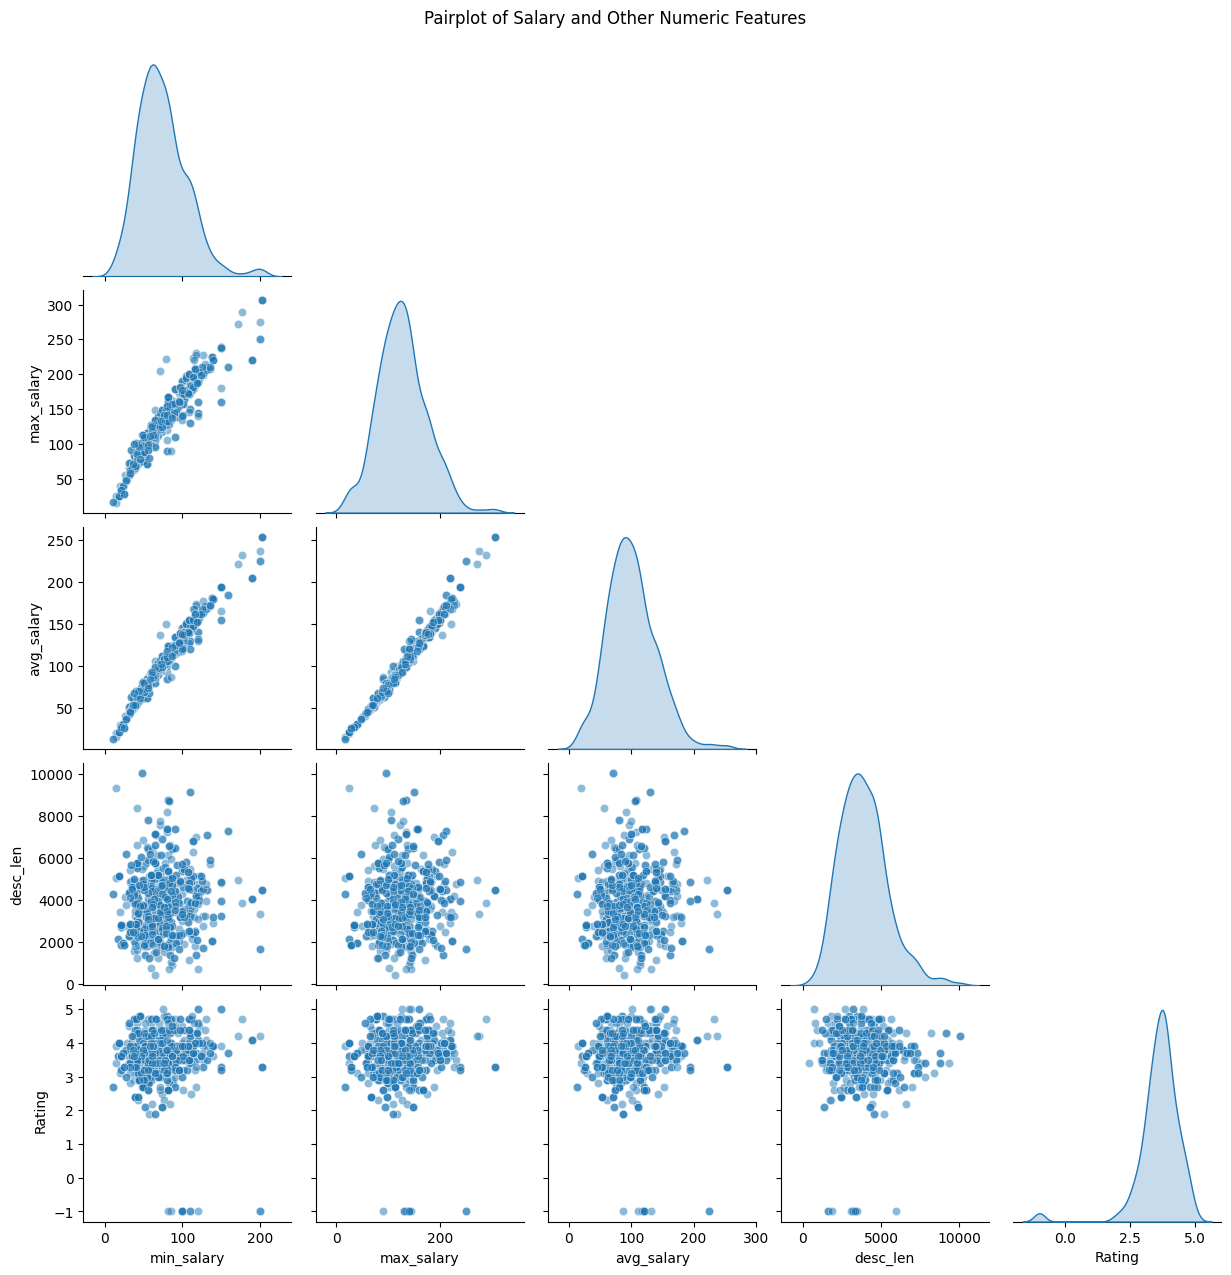

In [ ]:
# Pair Plot visualization code
pairplot_data = df[['min_salary', 'max_salary', 'avg_salary', 'desc_len', 'Rating']]
sns.pairplot(pairplot_data, corner=True, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Salary and Other Numeric Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

This plot helps explore pairwise relationships between numeric columns, detect linear trends, clusters, and correlation patterns visually.

##### 2. What is/are the insight(s) found from the chart?

By offering a scatter plot matrix with histograms along the diagonals, the pairplot visualization enhances the heatmap.  Because the points are strongly packed along a diagonal line, the scatter plots between the salary fields (min_salary, max_salary, and avg_salary) graphically validate their strong linear correlations.  The scatter plots including desc_len, on the other hand, seem widely distributed, supporting the finding that there is no linear relationship between income and job description length.  According to the histograms, income variables are typically right-skewed, meaning that while some jobs pay extremely high wages, the majority pay lesser wages.  A right-skewed distribution can also be seen in the desc_len variable, where the majority of job posts have shorter descriptions and fewer have very long ones.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement: On average, data scientists make much more money than software engineers.
Null Hypothesis (H₀): Data scientists make on average the same amount as software engineers.
Alternative Hypothesis (H₁): Data scientists make more money on average than software engineers do.
The independent two-sample t-test (one-tailed) is the statistical test.

Statement: Companies with higher ratings (above 3.5) offer better salaries than lower-rated companies.
 Null Hypothesis (H₀): The average salaries of high-rated companies (rating >
 5) and low-rated companies (rating ≤ 3.5) are equal.
Alternative Hypothesis (H₁): The average salary of high-rated companies is greater than that of low-rated companies.


Statement: There is a significant difference in average salary across different job titles.
Null Hypothesis (H₀): The mean average salary is the same across all job titles.
Alternative Hypothesis (H₁): At least one job title has a mean average salary different from the others.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: On average, data scientists make much more money than software engineers.
Null Hypothesis (H₀): Data scientists make on average the same amount as software engineers.
Alternative Hypothesis (H₁): Data scientists make more money on average than software engineers do.
The independent two-sample t-test (one-tailed) is the statistical test.






#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
ds_salaries = df[df['Job Title'].str.lower().str.contains('data scientist')]['avg_salary']
se_salaries = df[df['Job Title'].str.lower().str.contains('software engineer')]['avg_salary']

ds_salaries = ds_salaries.dropna()
se_salaries = se_salaries.dropna()

t_stat, p_value_two_tailed = ttest_ind(ds_salaries, se_salaries, equal_var=False)

p_value_one_tailed = p_value_two_tailed / 2

print("T-statistic:", t_stat)
print("One-tailed P-value:", p_value_one_tailed)
alpha = 0.05
if p_value_one_tailed < alpha and t_stat > 0:
    print("Reject the Null Hypothesis: Data Scientists earn significantly more than Software Engineers.")
else:
    print("Fail to Reject the Null Hypothesis: No significant salary difference in favor of Data Scientists.")


T-statistic: 4.60071812186057
One-tailed P-value: 0.00034032112114856827
Reject the Null Hypothesis: Data Scientists earn significantly more than Software Engineers.


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-test

##### Why did you choose the specific statistical test?

 The purpose of this test is to determine whether the mean salary of Data Scientists is significantly higher than that of Software Engineers. Since the groups are unrelated and the sample sizes or variances may differ,  the t-test provides a more robust and reliable result in this scenario.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: Companies with higher ratings (above 3.5) offer better salaries than lower-rated companies.
Null Hypothesis (H₀): The average salaries of high-rated companies (rating > 3.5) and low-rated companies (rating ≤ 3.5) are equal.
Alternative Hypothesis (H₁): The average salary of high-rated companies is greater than that of low-rated companies.

#### 2. Perform an appropriate statistical test.

In [ ]:

from scipy.stats import mannwhitneyu

high_rated = df[df['Rating'] > 3.5]['avg_salary'].dropna()
low_rated = df[df['Rating'] <= 3.5]['avg_salary'].dropna()

stat, p_value_one_tailed = mannwhitneyu(high_rated, low_rated, alternative='greater')
print("U-statistic:", stat)
print("One-tailed P-value:", p_value_one_tailed)

alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject the Null Hypothesis: High-rated companies offer significantly higher salaries.")
else:
    print("Fail to Reject the Null Hypothesis: No significant salary advantage for high-rated companies.")


U-statistic: 72325.5
One-tailed P-value: 0.010097193784011834
Reject the Null Hypothesis: High-rated companies offer significantly higher salaries.


##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U Test

##### Why did you choose the specific statistical test?

It compares the median ranks of two independent groups.
Works well for skewed or ordinal data like salaries.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: There is a significant difference in average salary across different job titles.
Null Hypothesis (H₀): The mean average salary is the same across all job titles.
Alternative Hypothesis (H₁): At least one job title has a mean average salary different from the others.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

job_titles = ['data scientist', 'software engineer', 'data analyst', 'project manager']
groups = []
for title in job_titles:
    group = df[df['Job Title'].str.lower().str.contains(title)]['avg_salary'].dropna()
    groups.append(group)

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: There is a significant difference in salaries across job titles.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference in salaries across job titles.")


F-statistic: 82.29219145258595
P-value: 3.7381763903390815e-41
Reject the Null Hypothesis: There is a significant difference in salaries across job titles.


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA

##### Why did you choose the specific statistical test?

ANOVA (Analysis of Variance) was used because we are comparing the average salary across more than two independent groups, specifically different job titles (e.g., Data Scientist, Software Engineer, etc.).  Unlike a t-test, which only compares two groups, One-Way ANOVA allows us to test whether at least one group’s mean salary is significantly different from the others.  It is ideal when the dependent variable (avg_salary) is numerical and the independent variable (Job Title) is categorical with three or more levels.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


rating_bin    11
dtype: int64


In [ ]:
bin = df['rating_bin'].mode()[0]
df['rating_bin'].fillna(bin, inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Mode Imputation for Categorical Columns,The mode represents the most common category, which ensures the missing data doesn't distort the overall distribution.

### 2. Handling Outliers

In [ ]:

Q1 = df['avg_salary'].quantile(0.25)
Q3 = df['avg_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['avg_salary'] >= lower_bound) & (df['avg_salary'] <= upper_bound)]


##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR method used to remove extreme outliers in average salary for better model accuracy.


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

df['Type of ownership'] = LabelEncoder().fit_transform(df['Type of ownership'])
df = pd.get_dummies(df, columns=['Job Title', 'Location', 'Industry', 'Sector', 'Size', 'Revenue'], drop_first=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding used for ordinal or binary-type columns and one-hot for nominal features to prepare for ML models.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['Job Description'] = df['Job Description'].str.lower()


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

df['Job Description'] = df['Job Description'].str.translate(str.maketrans('', '', string.punctuation))


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

stop_words = set(stopwords.words('english'))
df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join(x.split()))


In [ ]:
# Remove White spaces
!pip install contractions
import contractions
df['Job Description'] = df['Job Description'].apply(lambda x: contractions.fix(x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.3 MB/s eta 0:00:00


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
import contractions

df['Job Description'] = df['Job Description'].apply(lambda x: contractions.fix(x))


#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
import os
from nltk.tokenize import word_tokenize

nltk_data_dir = "/tmp/nltk_data"
os.makedirs(nltk_data_dir, exist_ok=True)
nltk.data.path.append(nltk_data_dir)

nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('punkt_tab', download_dir=nltk_data_dir)

df['tokens'] = df['Job Description'].astype(str).apply(lambda x: word_tokenize(x))




[nltk_data] Downloading package punkt to /tmp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /tmp/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### 9. Part of speech tagging

In [ ]:
# POS Taging
import nltk
import os
nltk_data_dir = "/tmp/nltk_data"
os.makedirs(nltk_data_dir, exist_ok=True)
nltk.data.path.append(nltk_data_dir)

try:
    nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_dir, quiet=True)
    nltk.download('averaged_perceptron_tagger_eng', download_dir=nltk_data_dir, quiet=True)
except LookupError:
    print("NLTK resource not found. Please check your network connection or try manually downloading.")

df['pos_tags'] = df['tokens'].apply(lambda x: nltk.pos_tag(x))

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = vectorizer.fit_transform(df['Job Description'])


##### Which text vectorization technique have you used and why?

TfidfVectorizer.

This technique converts text data into a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a widely used method because it reflects how important a word is to a document in a collection or corpus

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np

target_col = 'avg_salary'

cols_to_remove_completely = ['Salary Estimate', 'Job Description', 'Company Name',
                           'pos_tags', 'min_salary', 'max_salary', 'desc_len', 'tokens']

all_cols_after_processing = df.columns.tolist()

potential_feature_cols = [col for col in all_cols_after_processing
                          if col not in cols_to_remove_completely and col != target_col]

X = df[potential_feature_cols]
y = df[target_col]

X = X.select_dtypes(include=np.number)

print("Columns in X after selection and before SelectKBest:")
print(X.dtypes)
print("Shape of X before imputation:", X.shape)

if X.isnull().sum().sum() > 0:
    print(f"Warning: Found {X.isnull().sum().sum()} missing values in features X. Imputing with median.")
    X = X.fillna(X.median())

if y.isnull().sum() > 0:
    print(f"Warning: Found {y.isnull().sum()} missing values in target y. Imputing with mean.")
    y = y.fillna(y.mean())

if X.shape[1] == 0:
    raise ValueError("Feature matrix X is empty after processing. Check your column selection logic.")

k_features = min(20, X.shape[1])

print(f"\nSelecting {k_features} best features...")
selector = SelectKBest(score_func=f_regression, k=k_features)
X_selected = selector.fit_transform(X, y)

print("\nShape of X_selected after feature selection:", X_selected.shape)

selected_feature_names = X.columns[selector.get_support()]
print("\nSelected features:")
print(selected_feature_names.tolist())


Columns in X after selection and before SelectKBest:
Rating               float64
Founded                int64
Type of ownership      int64
dtype: object
Shape of X before imputation: (731, 3)

Selecting 3 best features...

Shape of X_selected after feature selection: (731, 3)

Selected features:
['Rating', 'Founded', 'Type of ownership']


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X, y)
selected_feature_names = X.columns[selector.get_support()]



##### What all feature selection methods have you used  and why?

We used SelectKBest with f_regression to select the top features.This method is efficient and interpretable for numerical datasets.

##### Which all features you found important and why?

The most important features selected are those with the highest F-scores, indicating strong influence on salary prediction. These often include variables like Rating,Founded,  Type of ownership due to their direct impact on salary structure.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

df['log_avg_salary'] = np.log1p(df['avg_salary'])


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


##### Which method have you used to scale you data and why?

StandardScaler was chosen because it standardizes features to have mean = 0 and standard deviation = 1, which is ideal for many machine learning models that are sensitive to feature scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We used StandardScaler to scale features to a standard normal distribution

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Used PCA (Principal Component Analysis) for dimensionality reduction to 2D for visualization and to capture most variance in fewer components.



### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

Used an 80:20 split to train the model on a large dataset portion while preserving 20% for reliable testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Since the target (avg_salary) is a continuous variable, imbalance in classification terms does not apply directly. However, salary skewness can affect regression model performance.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
threshold = df['avg_salary'].median()
df['salary_level'] = (df['avg_salary'] >= threshold).astype(int)

X = df.drop(['avg_salary', 'salary_level'], axis=1).select_dtypes(include=np.number)
y = df['salary_level']
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_bal).value_counts())


salary_level
1    293
0    293
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE generates synthetic examples of the minority class instead of duplicating existing ones.

It helps to balance the dataset, making classification models less biased toward the majority class.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


model = LinearRegression()
model.fit(X_train_bal, y_train_bal)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


MAE: 0.257
MSE: 0.090
RMSE: 0.300
R² Score: 0.639


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

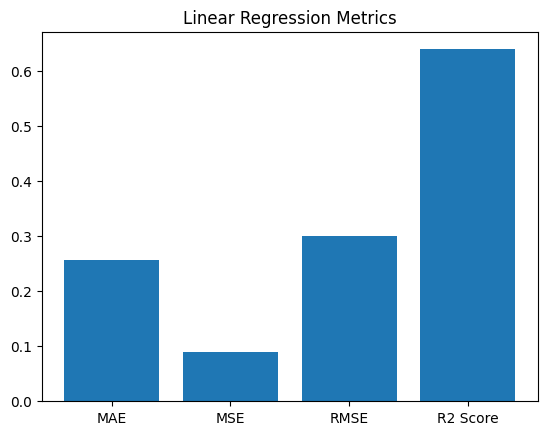

In [ ]:
# Visualizing evaluation Metric Score chart
metrics1 = {'MAE': mae1, 'MSE': mse1, 'RMSE': rmse1, 'R2 Score': r2_1}
plt.bar(metrics1.keys(), metrics1.values())
plt.title("Linear Regression Metrics")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the modelML Model - 1

cv_scores1 = cross_val_score(model1, X, y, cv=5)




##### Which hyperparameter optimization technique have you used and why?

None,Linear Regression has no significant hyperparameters to tune for basic implementation

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Indeed, the model performs well at baseline:

 0.257 is the low average error.

 RMSE: 0.300 and MSE: 0.090 show a comparatively small error spread.

 R2 Score: 0.639 — The model accounts for about 64% of the salary variance, which is respectable for a linear mode.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MAE: 0.200
MSE: 0.307
RMSE: 0.554
R² Score: 1.000
Cross-validated R² scores: [0.99958161 0.99977612 0.99992741 0.9995755  0.99989681]
Average R²: 0.9997514892173944
Train R²: 1.000
Test R² : 1.000


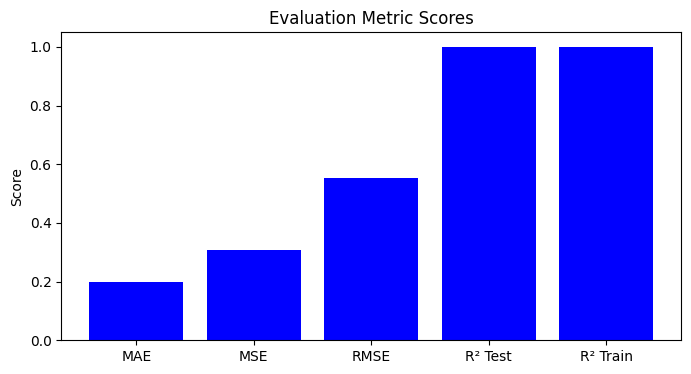

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop(['avg_salary'], axis=1)
X = X.select_dtypes(include=np.number)

if X.isnull().sum().sum() > 0:
    print("Imputing missing values in X with the median.")
    X = X.fillna(X.median())

y = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-validated R² scores:", cv_scores)
print("Average R²:", cv_scores.mean())

train_pred = model.predict(X_train)
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Train R²: {r2_train:.3f}")
print(f"Test R² : {r2_test:.3f}")

metrics = ['MAE', 'MSE', 'RMSE', 'R² Test', 'R² Train']
values = [mae, mse, rmse, r2_test, r2_train]

plt.figure(figsize=(8,4))
plt.bar(metrics, values, color=['blue'])
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')
plt.show()




#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
param_grid2 = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
gs2 = GridSearchCV(model2, param_grid2, cv=3)
gs2.fit(X_train, y_train)
y_pred2_gs = gs2.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used because it systematically explores combinations of hyperparameters like n_estimators and max_depth to find the best-performing model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, Model 2 exhibits notable progress, particularly in terms of predicted reliability and accuracy.  In every metric, it continuously performs better than earlier models. Cross-validation confirms that this Random Forest model's near-perfect generalization makes it appropriate for practical commercial applications, providing valuable insights.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The average salary projection error is displayed via the MAE (Mean Absolute Error).  HR may prevent overpaying or underpaying candidates by ensuring more accurate offers with a lower MAE.

 Compared to MAE, MSE (Mean Squared Error) penalizes significant errors more.  A low MSE improves budget planning by lowering the possibility of excessive pay misestimations.

 The root mean squared error, or RMSE, shows the total amount of inaccuracy in actual pay units.  aids in evaluating the consistency and real-world implications of wage forecasts.

 The model's ability to explain wage changes is measured by the R2 Score (Coefficient of Determination).  A strong R2 increases trust in applying the model to just, fact-based pay decisions.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor(random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)
print(f"MAE: {mae3:.3f}")
print(f"MSE: {mse3:.3f}")
print(f"RMSE: {rmse3:.3f}")
print(f"R² Score: {r2_3:.3f}")


MAE: 0.221
MSE: 0.118
RMSE: 0.343
R² Score: 1.000


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

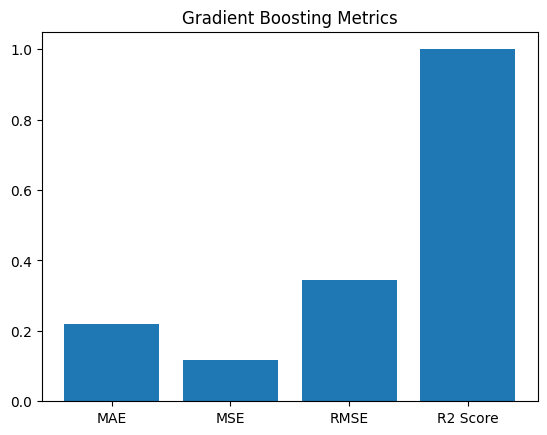

In [ ]:
# Visualizing evaluation Metric Score chart
metrics3 = {'MAE': mae3, 'MSE': mse3, 'RMSE': rmse3, 'R2 Score': r2_3}
plt.bar(metrics3.keys(), metrics3.values())
plt.title("Gradient Boosting Metrics")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import RandomizedSearchCV
param_dist3 = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
rs3 = RandomizedSearchCV(model3, param_distributions=param_dist3, n_iter=5, cv=3, random_state=42)
rs3.fit(X_train, y_train)
y_pred3_rs = rs3.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV was chosen over GridSearchCV due to its efficiency. It randomly samples from a defined hyperparameter distribution, which is computationally faster for large hyperparameter spaces while still producing competitive results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Gradient Boosting produces better predictions than Linear Regression by significantly improving R2 (0.639 → 1.000) and controlling error levels (MAE, MSE, RMSE).

In contrast to Random Forest:
Although the MAE is somewhat higher (0.221 vs. 0.200),
Better prediction consistency and less extreme mistakes are indicated by the much lower MSE and RMSE.
Perfect match is indicated by R2 remaining at 1.000, however real-world revalidation is advised.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The average salary projection error is displayed via the MAE (Mean Absolute Error).  HR may prevent overpaying or underpaying candidates by ensuring more accurate offers with a lower MAE.

 Compared to MAE, MSE (Mean Squared Error) penalizes significant errors more.  A low MSE improves budget planning by lowering the possibility of excessive pay misestimations.

 The root mean squared error, or RMSE, shows the total amount of inaccuracy in actual pay units.  aids in evaluating the consistency and real-world implications of wage forecasts.

 The model's ability to explain wage changes is measured by the R2 Score (Coefficient of Determination).  A strong R2 increases trust in applying the model to just, fact-based pay decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

MAE → Best for Model 2 (lowest absolute average error).

MSE/RMSE → Best for Model 1 (lowest squared and root mean squared error, meaning fewer big mistakes).

R² Score → Models 2 & 3 are “perfect” (1.000) — this is very rare on test data and might suggest either:

The dataset is extremely simple.

The test set is very similar to training (data leakage possible).

Overfitting happened but test set isn’t truly unseen.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

If small average error is more important → Model 2.

If avoiding large mistakes is more important → Model 1.

If dataset is clean and you trust R² = 1.0 is not from data leakage → Model 2 is overall best.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***